In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.4/778.4 kB 4.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import ultralytics
ultralytics.__version__

'8.2.22'

In [ ]:
%cd /content/drive/MyDrive/temp

/content/drive/MyDrive/temp


In [ ]:
import cv2
import pandas as pd
from ultralytics import YOLO
from tracker import*

model=YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 176MB/s]


In [ ]:
class_list = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

In [ ]:
tracker=Tracker()
count=0

In [ ]:
cap=cv2.VideoCapture('/content/drive/MyDrive/temp/2165-155327596_small.mp4')

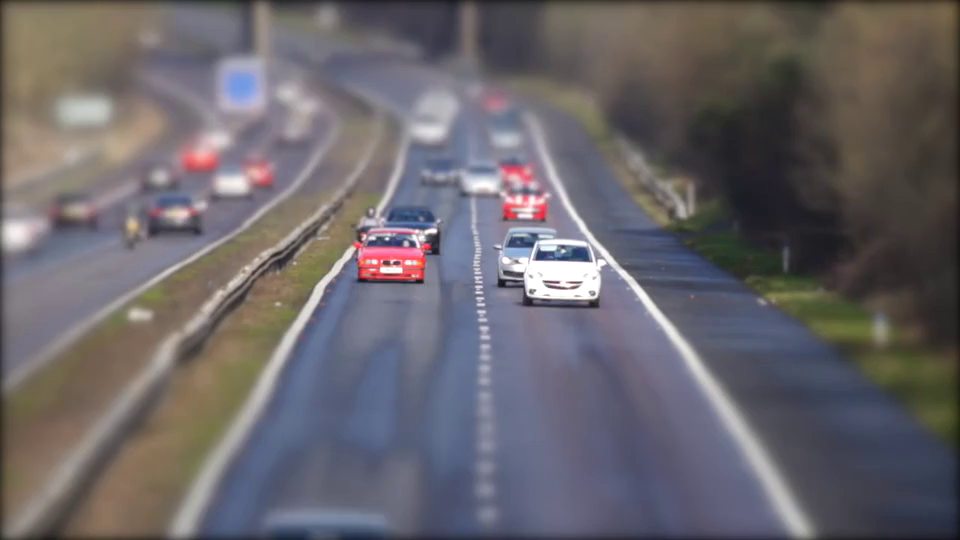

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Open the video file
cap = cv2.VideoCapture('/content/drive/MyDrive/temp/2165-155327596_small.mp4')

# Check if the video opened successfully
if not cap.isOpened():
    print("Failed to open video.")
else:
    # Read the first frame
    ret, frame = cap.read()

    if ret:
        # Display the first frame (optional)
        cv2_imshow(frame)
        cv2.waitKey(0)  # Wait for a key press to close the window

        # Save the first frame to an image file (optional)
        cv2.imwrite('first_frame.jpg', frame)

        # Process the first frame as needed
        # (Insert your processing code here)

        # Example: Resize the frame
        frame_resized = cv2.resize(frame, (1020, 500))

        # Example: Save the resized frame (optional)
        cv2.imwrite('first_frame_resized.jpg', frame_resized)
    else:
        print("Failed to read the first frame.")

    # Release the video capture object
    cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()



In [ ]:
import cv2

# Open the video file
cap = cv2.VideoCapture('/content/drive/MyDrive/temp/2165-155327596_small.mp4')

# Check if the video opened successfully
if cap.isOpened():
    print("Video is working.")
else:
    print("Failed to open video.")


Video is working.


In [ ]:
down={}
up={}

counter_down=[]
counter_up=[]

In [ ]:
import cv2
import pandas as pd

# Assuming model, tracker, and class_list are already defined
cap = cv2.VideoCapture('/content/drive/MyDrive/temp/2165-155327596_small.mp4')

# Initialize video writer
output_video_folder = "output_video/"
output_video_path = output_video_folder + "output_video.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, 20.0, (1020, 500))

count = 0
down = {}
up = {}
counter_down = []
counter_up = []

# Maintain a set of IDs that have already been counted
counted_ids_down = set()
counted_ids_up = set()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    count += 1
    frame = cv2.resize(frame, (1020, 500))

    results = model.predict(frame)
    a = results[0].boxes.data
    a = a.detach().cpu().numpy()  # Ensure the data is on CPU
    px = pd.DataFrame(a).astype("float")

    list = []

    for index, row in px.iterrows():
        x1 = int(row[0])
        y1 = int(row[1])
        x2 = int(row[2])
        y2 = int(row[3])
        d = int(row[5])
        c = class_list[d]
        if 'car' in c:
            list.append([x1, y1, x2, y2])

    bbox_id = tracker.update(list)
    for bbox in bbox_id:
        x3, y3, x4, y4, id = bbox
        cx = int((x3 + x4) // 2)
        cy = int((y3 + y4) // 2)

        red_line_y = 255
        blue_line_y = 378
        offset = 10

        # Condition for counting the cars which are entering from red line and exiting from blue line
        if red_line_y < (cy + offset) and red_line_y > (cy - offset):
            down[id] = cy
        if id in down and id not in counted_ids_down:
            if blue_line_y < (cy + offset) and blue_line_y > (cy - offset):
                cv2.circle(frame, (cx, cy), 4, (0, 0, 255), -1)
                cv2.putText(frame, str(id), (cx, cy), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)
                counter_down.append(id)  # Append to list of counted IDs
                counted_ids_down.add(id)  # Mark ID as counted

        # Condition for cars entering from blue line
        if blue_line_y < (cy + offset) and blue_line_y > (cy - offset):
            up[id] = cy
        if id in up and id not in counted_ids_up:
            if red_line_y < (cy + offset) and red_line_y > (cy - offset):
                cv2.circle(frame, (cx, cy), 4, (0, 0, 255), -1)
                cv2.putText(frame, str(id), (cx, cy), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)
                counter_up.append(id)  # Append to list of counted IDs
                counted_ids_up.add(id)  # Mark ID as counted

    text_color = (255, 255, 255)  # White color for text
    red_color = (0, 0, 255)  # (B, G, R)
    blue_color = (255, 0, 0)  # (B, G, R)
    green_color = (0, 255, 0)  # (B, G, R)

    cv2.line(frame, (325, 255), (680, 255), red_color, 3)  # Starting coordinates and end of line coordinates
    cv2.putText(frame, 'red line', (305, 255), cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 1, cv2.LINE_AA)

    cv2.line(frame, (266, 378), (750, 378), blue_color, 3)  # Second line
    cv2.putText(frame, 'blue line', (266, 378), cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 1, cv2.LINE_AA)

    downwards = len(counter_down)
    cv2.putText(frame, 'going down - ' + str(downwards), (60, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, green_color, 1, cv2.LINE_AA)

    upwards = len(counter_up)
    cv2.putText(frame, 'going up - ' + str(upwards), (60, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 1, cv2.LINE_AA)

    # Write the frame to the output video
    out.write(frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
out.release()
cv2.destroyAllWindows()



0: 320x640 14 cars, 10.7ms
Speed: 3.5ms preprocess, 10.7ms inference, 1.9ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 15 cars, 10.6ms
Speed: 2.4ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 16 cars, 1 bus, 24.8ms
Speed: 2.2ms preprocess, 24.8ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 15 cars, 1 bus, 10.5ms
Speed: 2.3ms preprocess, 10.5ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 17 cars, 10.5ms
Speed: 2.3ms preprocess, 10.5ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 16 cars, 10.5ms
Speed: 2.2ms preprocess, 10.5ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 15 cars, 10.5ms
Speed: 3.1ms preprocess, 10.5ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 16 cars, 10.5ms
Speed: 2.9ms preprocess, 10.5ms inference, 1.4ms postprocess per image at shape (1,